In [4]:
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

* 음원: https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2

In [5]:
!wget https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2
!tar -xvf LJSpeech-1.1.tar.bz2

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
LJSpeech-1.1/wavs/LJ008-0225.wav
LJSpeech-1.1/wavs/LJ050-0244.wav
LJSpeech-1.1/wavs/LJ025-0045.wav
LJSpeech-1.1/wavs/LJ021-0091.wav
LJSpeech-1.1/wavs/LJ001-0030.wav
LJSpeech-1.1/wavs/LJ026-0125.wav
LJSpeech-1.1/wavs/LJ019-0088.wav
LJSpeech-1.1/wavs/LJ003-0200.wav
LJSpeech-1.1/wavs/LJ045-0196.wav
LJSpeech-1.1/wavs/LJ016-0060.wav
LJSpeech-1.1/wavs/LJ009-0135.wav
LJSpeech-1.1/wavs/LJ014-0051.wav
LJSpeech-1.1/wavs/LJ028-0059.wav
LJSpeech-1.1/wavs/LJ031-0222.wav
LJSpeech-1.1/wavs/LJ018-0106.wav
LJSpeech-1.1/wavs/LJ027-0083.wav
LJSpeech-1.1/wavs/LJ016-0063.wav
LJSpeech-1.1/wavs/LJ050-0241.wav
LJSpeech-1.1/wavs/LJ025-0014.wav
LJSpeech-1.1/wavs/LJ016-0368.wav
LJSpeech-1.1/wavs/LJ047-0025.wav
LJSpeech-1.1/wavs/LJ007-0056.wav
LJSpeech-1.1/wavs/LJ035-0120.wav
LJSpeech-1.1/wavs/LJ015-0178.wav
LJSpeech-1.1/wavs/LJ021-0115.wav
LJSpeech-1.1/wavs/LJ039-0151.wav
LJSpeech-1.1/wavs/LJ004-0043.wav
LJSpeech-1.1/wavs/LJ019-0255.wav
LJSpeech-1.1/wavs/LJ016-0118.wav
LJSpeec

## wav 파일 읽기

In [6]:
import os
from os import listdir
from os.path import isfile, join

data_dir = './LJSpeech-1.1/wavs'

data_files = [join(data_dir, f) for f in listdir(data_dir) if isfile(join(data_dir, f)) if 'wav' in f]
data_files.sort()

print('wave files : ', len(data_files))
print(data_files[0])

wave files :  6117
./LJSpeech-1.1/wavs/LJ001-0001.wav


## 오디오 파일 읽기

wav : [-0.00027466  0.          0.         ... -0.00088501 -0.00097656
 -0.00109863]
sample rate : 22050 length : 41885
duration : 1.899546485260771 seconds


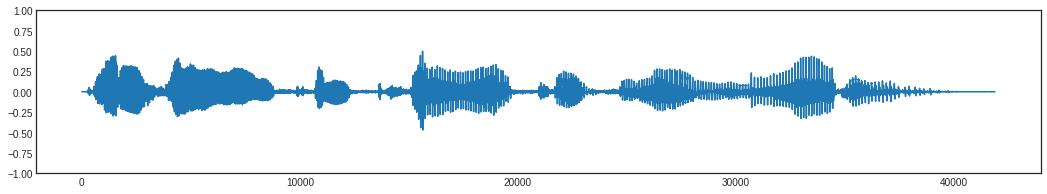

In [7]:
wav, sr = librosa.core.load(data_files[1])
print('wav :', wav)
print('sample rate :', sr, 'length :', len(wav))
print('duration :', len(wav) / sr, 'seconds')

plt.figure(figsize=[18, 3])
plt.plot(wav)
plt.ylim([-1, 1])
plt.show()

ipd.Audio(wav, rate=sr)

### 과제 1: sample rate 44100으로 변환하여 파형을 시각화 후 소리 듣기

41885 83770


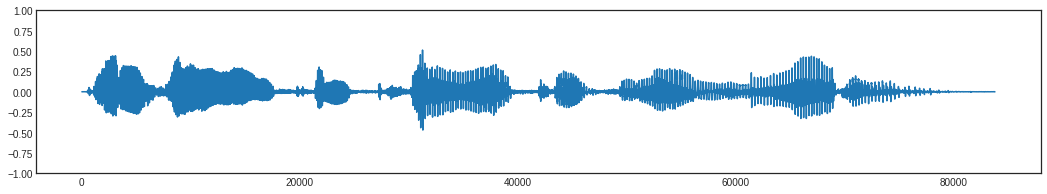

In [14]:
# sample rate 44100으로 만들어 시각화 후 재생

y_44_1k = librosa.resample(wav, sr, 44100)

print(len(wav), len(y_44_1k))

plt.figure(figsize=[18, 3])
plt.plot(y_44_1k)
plt.ylim([-1, 1])
plt.show()

ipd.Audio(y_44_1k, rate=44100)

### 과제 2: sample rate 8000으로 변환하여 파형을 시각화 후 소리 듣기

41885 15197


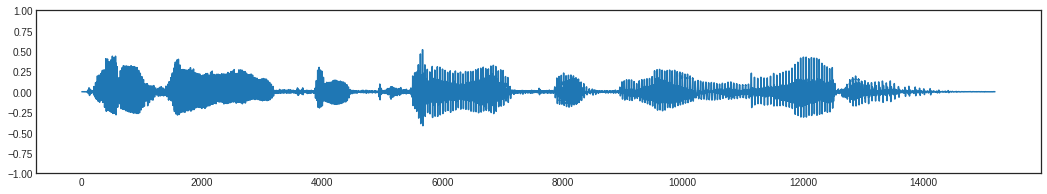

In [11]:
# sample rate 8000으로 만들어 시각화 후 재생

y_8k = librosa.resample(wav, sr, 8000)

print(len(wav), len(y_8k))

plt.figure(figsize=[18, 3])
plt.plot(y_8k)
plt.ylim([-1, 1])
plt.show()

ipd.Audio(y_8k, rate=8000)

## 파형 시각화(Zoom-In)

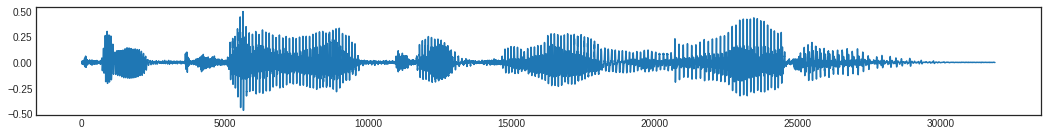

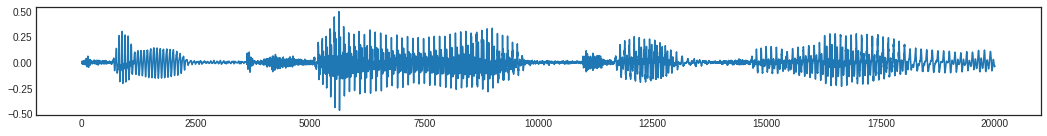

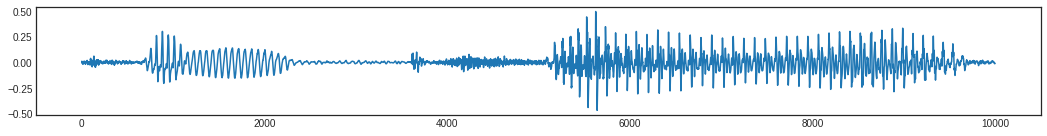

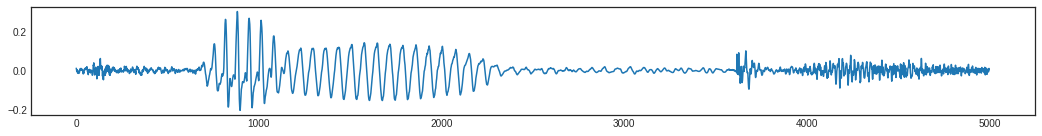

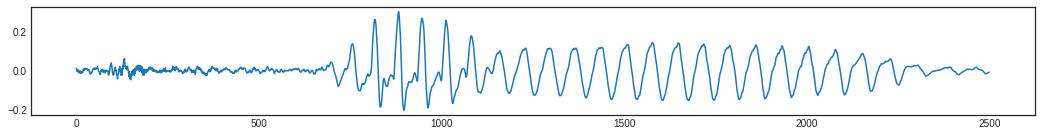

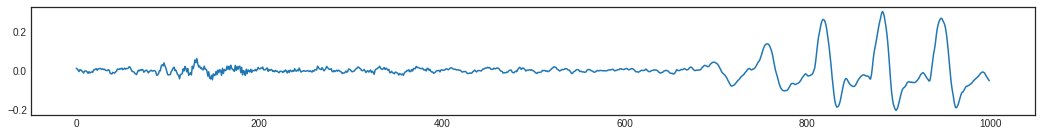

In [12]:
# wav 파형 10000-50000 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:50000])
plt.show()

# wav 파형 10000-30000 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:30000])
plt.show()

# wav 파형 10000-20000 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:20000])
plt.show()

# wav 파형 10000-15000 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:15000])
plt.show()

# wav 파형 10000-12500 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:12500])
plt.show()

# wav 파형 10000-11000 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:11000])
plt.show()

## Normalization

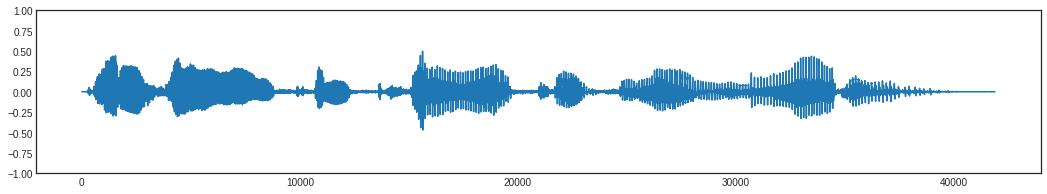

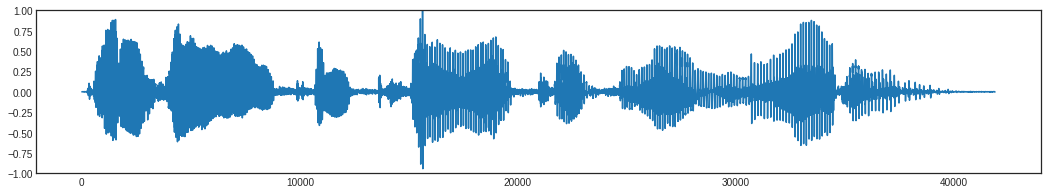

In [13]:
normed_wav = wav / max(np.abs(wav))

plt.figure(figsize=[18, 3])
plt.plot(wav)
plt.ylim([-1, 1])
plt.show()

plt.figure(figsize=[18, 3])
plt.plot(normed_wav)
plt.ylim([-1, 1])
plt.show()

### 과제 3: 파형을 2배, 3배 증가

41885 83770


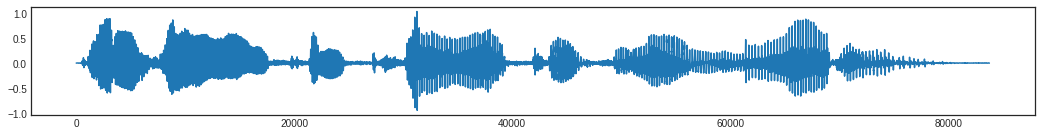

In [15]:
# 파형을 2배 증가
normed_wav_2 = librosa.resample(normed_wav, sr, sr*2)
print(len(normed_wav), len(normed_wav_2))

# 2배 증가한 파형 시각화
plt.figure(figsize=[18, 2])
plt.plot(normed_wav_2)
plt.show()

# 2배 증가한 소리 듣기
ipd.Audio(normed_wav_2, rate=sr*2)

41885 125655


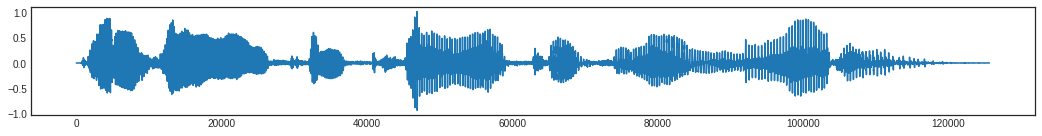

In [16]:
# 파형을 3배 증가
normed_wav_3 = librosa.resample(normed_wav, sr, sr*3)
print(len(normed_wav), len(normed_wav_3))

# 3배 증가한 파형 시각화
plt.figure(figsize=[18, 2])
plt.plot(normed_wav_3)
plt.show()

# 3배 증가한 소리 듣기
ipd.Audio(normed_wav_3, rate=sr*3)

### 과제 4: 파형을 0.5, 0.25배로 감소

41885 20943


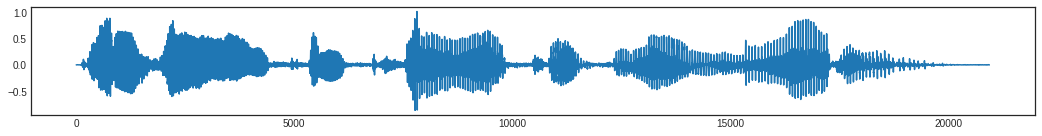

In [17]:
# 파형을 0.5배 감소
normed_wav_0_5 = librosa.resample(normed_wav, sr, sr*0.5)
print(len(normed_wav), len(normed_wav_0_5))

# 0.5배 감소한 파형 시각화
plt.figure(figsize=[18, 2])
plt.plot(normed_wav_0_5)
plt.show()

# 0.5배 감소한 소리 듣기
ipd.Audio(normed_wav_0_5, rate=sr*0.5)

41885 10472


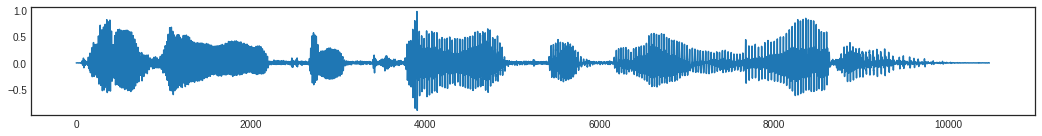

In [18]:
# 파형을 0.5배 감소
normed_wav_0_25 = librosa.resample(normed_wav, sr, sr*0.25)
print(len(normed_wav), len(normed_wav_0_25))

# 0.5배 감소한 파형 시각화
plt.figure(figsize=[18, 2])
plt.plot(normed_wav_0_25)
plt.show()

# 0.5배 감소한 소리 듣기
ipd.Audio(normed_wav_0_25, rate=sr*0.25)

##  8-bit Quantization


quantized values : [-29 -22 -21 -22 -34 -32 -32 -21 -11 -24 -23   7  15  23  20 -11  17  44
  49  60  60  62  73  63  36  35  41  47  61  48  29  16   1 -10  -6 -14
 -25 -21 -23 -26 -34 -50 -57 -47 -43 -43 -38 -36 -22 -10 -18 -19 -13  -8
  11  20  20  29  32  33  31  23  19  26  27  25  18   7  -1  -5 -12 -20
 -24 -26 -27 -28 -33 -42 -44 -46 -43 -40 -41 -43 -39 -47 -39 -40 -28 -28
   8  36  13  38 -14  -6  45  55  88  96]


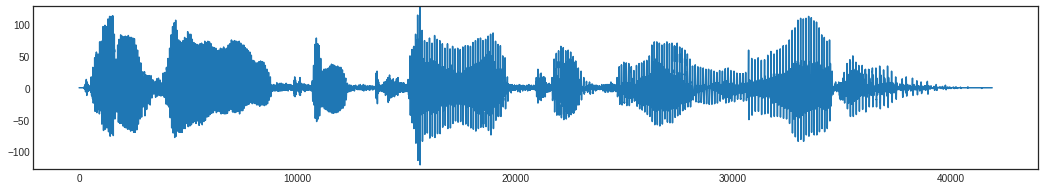

In [19]:
Bit = 8
max_value = 2 ** (Bit-1) # 128

# max_value를 곱함
quantized_8_wav = normed_wav * max_value
# integer로 반올림
quantized_8_wav = np.round(quantized_8_wav).astype(int)
# 범위 설정
quantized_8_wav = np.clip(quantized_8_wav, -max_value, max_value-1)

# quantized된 값들 보기
print('quantized values :', quantized_8_wav[1000:1100])

# quantized된 파형 보기
plt.figure(figsize=[18, 3])
plt.plot(quantized_8_wav)
plt.ylim([-max_value, max_value])
plt.show()

# wav 들어보기
ipd.Audio(quantized_8_wav, rate=sr)

### 과제 5: 16-bit quantization 적용 후, 시각화와 소리 듣기

quantized values : [ -7425  -5665  -5333  -5727  -8620  -8317  -8294  -5436  -2702  -6171
  -5763   1705   3769   5952   5135  -2794   4383  11195  12443  15378
  15428  15755  18740  16051   9118   9046  10430  12035  15508  12270
   7344   4086    335  -2571  -1623  -3658  -6478  -5494  -5870  -6597
  -8694 -12762 -14705 -11944 -10912 -10938  -9634  -9219  -5727  -2561
  -4502  -4902  -3365  -1975   2810   5060   5024   7477   8216   8365
   7846   5888   4980   6601   6930   6290   4522   1708   -173  -1189
  -3180  -5032  -6107  -6748  -6898  -7182  -8499 -10637 -11175 -11900
 -11065 -10195 -10388 -11097  -9895 -11918 -10066 -10349  -7204  -7292
   2113   9331   3393   9709  -3614  -1551  11484  14008  22511  24666]


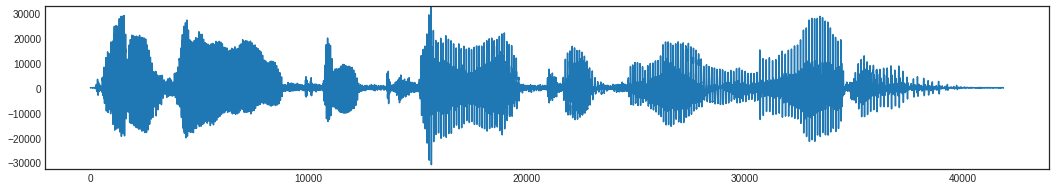

In [20]:
Bit = 16
max_value = 2 ** (Bit-1)

# max_value를 곱함
quantized_16_wav = normed_wav * max_value
# integer로 반올림
quantized_16_wav = np.round(quantized_16_wav).astype(int)
# 범위 설정
quantized_16_wav = np.clip(quantized_16_wav, -max_value, max_value-1)

# quantized된 값들 보기
print('quantized values :', quantized_16_wav[1000:1100])

# quantized된 파형 보기
plt.figure(figsize=[18, 3])
plt.plot(quantized_16_wav)
plt.ylim([-max_value, max_value])
plt.show()

# wav 들어보기
ipd.Audio(quantized_16_wav, rate=sr)

## mu-law encoding


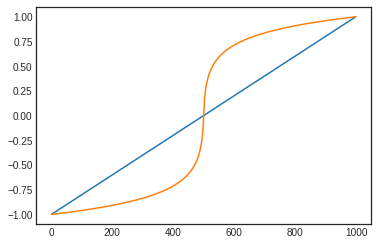

In [21]:
def mu_law(x, mu=255):
    # reference : https://en.wikipedia.org/wiki/Μ-law_algorithm
    return np.sign(x) * np.log(1 + mu * np.abs(x)) / np.log(1 + mu)
    
x = np.linspace(-1, 1, 1000)
x_mu = mu_law(x)

plt.figure(figsize=[6, 4])
plt.plot(x)
plt.plot(x_mu)
plt.show()

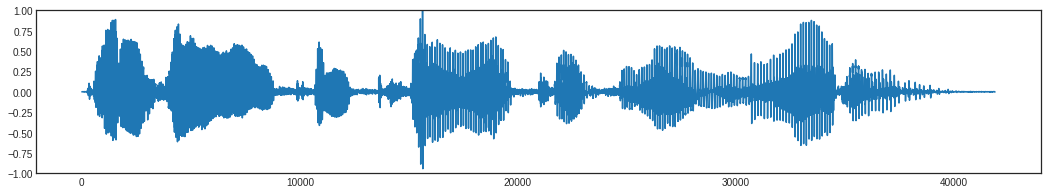

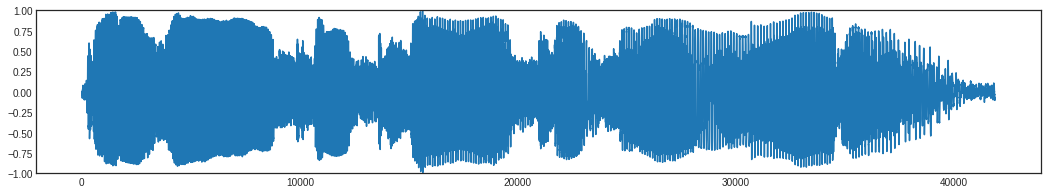

In [22]:
wav_mulaw = mu_law(normed_wav)

plt.figure(figsize=[18, 3])
plt.plot(normed_wav)
plt.ylim([-1, 1])
plt.show()

plt.figure(figsize=[18, 3])
plt.plot(wav_mulaw)
plt.ylim([-1, 1])
plt.show()

ipd.Audio(wav_mulaw, rate=sr)

## mu-law 8bit quantization

quantized values : [ -94  -88  -87  -88  -97  -97  -97  -87  -71  -90  -88   61   79   89
   86  -72   82  103  106  111  111  111  115  112   99   99  102  105
  111  105   94   81   30  -70  -60  -78  -91  -87  -89  -91  -98 -106
 -110 -105 -103 -103 -100  -99  -88  -70  -83  -85  -76  -65   72   85
   85   94   96   97   95   89   85   91   92   90   83   61  -20  -54
  -75  -85  -90  -92  -92  -93  -97 -102 -103 -105 -103 -101 -102 -103
 -101 -105 -101 -102  -93  -94   66   99   76  100  -78  -59  104  109
  119  121]


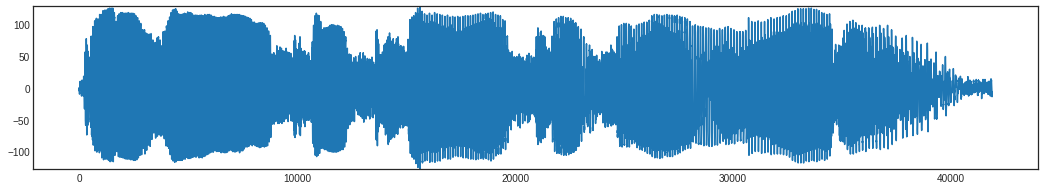

In [23]:
Bit = 8
max_value = 2 ** (Bit-1) # 128

quantized_8mu_wav = wav_mulaw * max_value
quantized_8mu_wav = np.round(quantized_8mu_wav).astype(int)
quantized_8mu_wav = np.clip(quantized_8mu_wav, -max_value, max_value-1)

print('quantized values :', quantized_8mu_wav[1000:1100])

plt.figure(figsize=[18, 3])
plt.plot(quantized_8mu_wav)
plt.ylim([-max_value, max_value])
plt.show()

## mu-law encoded wav reconstruction 

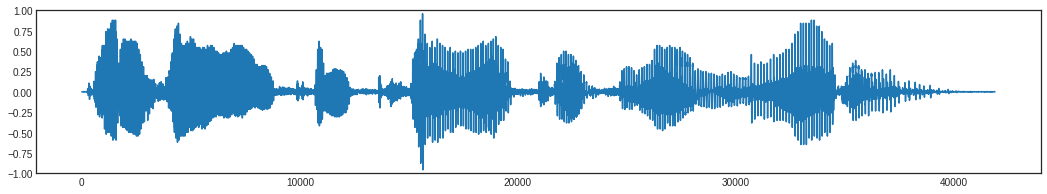

In [24]:
def inverse_mu_law(y, mu=255):
    # reference : https://en.wikipedia.org/wiki/Μ-law_algorithm
    return np.sign(y) * (1/mu) * ((1+mu) ** np.abs(y) - 1)

dequantized_wav = quantized_8mu_wav / max_value
reconstructed_wav = inverse_mu_law(dequantized_wav)

plt.figure(figsize=[18, 3])
plt.plot(reconstructed_wav)
plt.ylim([-1, 1])
plt.show()

# reconstructed_wav 들어보기, wav와 quantized_8_wav reconstructed_wav 비교해보기
ipd.Audio(reconstructed_wav, rate=sr)